# Multithreading
1. you can execute multiple tasks at a time

# Create 2 seperate functions

In [1]:
import time
time.sleep(2)
print("Hello")
time.sleep(3)
print("World!")

Hello
World!


# Write a function to show simple interest

In [4]:
def simple_interest(p: float, n: float, r: float):
    print("Simple Interest function started")
    time.sleep(2)
    i = (p * n * r) / 100
    a = p + i
    print(f"Simple Interest : {i} INR")
    print(f"Amount : {a} INR")
    print("Simple Interest function complete")

In [5]:
%%time
simple_interest(p=50_000, n=5, r=7.5)

Simple Interest function started
Simple Interest : 18750.0 INR
Amount : 68750.0 INR
Simple Interest function complete
CPU times: total: 15.6 ms
Wall time: 2 s


In [6]:
import math
def hypotenuse(a: int|float, b: int|float):
    print("Hypotenuse function started")
    time.sleep(3)
    c = math.sqrt(a**2 + b**2)
    print(f"Hypotenuse of {a} and {b} is {c:.2f}")
    print("Hypotenuse function is complete")

In [7]:
%%time
hypotenuse(3, 4)

Hypotenuse function started
Hypotenuse of 3 and 4 is 5.00
Hypotenuse function is complete
CPU times: total: 0 ns
Wall time: 3 s


In [8]:
%%time
hypotenuse(12, 13)

Hypotenuse function started
Hypotenuse of 12 and 13 is 17.69
Hypotenuse function is complete
CPU times: total: 0 ns
Wall time: 3 s


# Single Threaded Execution

In [9]:
%%time
simple_interest(p=50_000, n=5, r=7.1)
hypotenuse(4, 5)

Simple Interest function started
Simple Interest : 17750.0 INR
Amount : 67750.0 INR
Simple Interest function complete
Hypotenuse function started
Hypotenuse of 4 and 5 is 6.40
Hypotenuse function is complete
CPU times: total: 0 ns
Wall time: 5.01 s


# Multithreaded execution

In [10]:
%%time
from threading import Thread

# Create a thread for simple interest function
th1 = Thread(target=simple_interest, args=(60_000, 5, 7.1))
th2 = Thread(target=hypotenuse, args=(12, 13))

# Start both threads
th1.start()
th2.start()

# Wait for all threads to finish
th1.join()
th2.join()

Simple Interest function started
Hypotenuse function started
Simple Interest : 21300.0 INR
Amount : 81300.0 INR
Simple Interest function complete
Hypotenuse of 12 and 13 is 17.69
Hypotenuse function is complete
CPU times: total: 62.5 ms
Wall time: 3.07 s


# Single function apply threading on multiple values

In [28]:
def square(num: int):
    time.sleep(1)
    print(f"Square of {num} is {num**2}")

In [29]:
# Single Threaded execution
def square_list(nums: list[int]):
    for i in nums:
        square(i)

In [30]:
%%time
square_list(nums=[11, 12, 13])

Square of 11 is 121
Square of 12 is 144
Square of 13 is 169
CPU times: total: 31.2 ms
Wall time: 3.17 s


In [31]:
%%time
a = [10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
square_list(nums=a)

Square of 10 is 100
Square of 11 is 121
Square of 12 is 144
Square of 13 is 169
Square of 14 is 196
Square of 15 is 225
Square of 16 is 256
Square of 17 is 289
Square of 18 is 324
Square of 19 is 361
CPU times: total: 46.9 ms
Wall time: 10.2 s


# Multithreading

In [34]:
from threading import Thread

def square_multi(nums: list[int]):
    # Initialize list of threads
    threads = []
    # Apply for loop on nums
    for i in nums:
        th = Thread(target=square, args=(i,))
        th.start()
        threads.append(th)
    # Apply for loop on threads and wait for threads to complete
    for th in threads:
        th.join()

In [35]:
%%time
print(a)
square_multi(nums=a)

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]
Square of 10 is 100
Square of 12 is 144
Square of 11 is 121
Square of 13 is 169
Square of 14 is 196
Square of 15 is 225
Square of 17 is 289
Square of 16 is 256
Square of 18 is 324
Square of 19 is 361
CPU times: total: 31.2 ms
Wall time: 1.03 s


In [36]:
b = list(range(1, 101))
print(b)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [38]:
%%time
square_multi(b)

Square of 1 is 1
Square of 2 is 4
Square of 3 is 9
Square of 4 is 16
Square of 7 is 49
Square of 5 is 25
Square of 6 is 36
Square of 8 is 64
Square of 9 is 81
Square of 10 is 100
Square of 11 is 121
Square of 12 is 144
Square of 13 is 169
Square of 14 is 196
Square of 16 is 256
Square of 15 is 225
Square of 17 is 289
Square of 18 is 324
Square of 19 is 361
Square of 21 is 441
Square of 20 is 400
Square of 22 is 484
Square of 23 is 529
Square of 24 is 576
Square of 25 is 625
Square of 26 is 676
Square of 28 is 784
Square of 27 is 729
Square of 29 is 841
Square of 30 is 900
Square of 32 is 1024
Square of 31 is 961
Square of 34 is 1156
Square of 33 is 1089
Square of 36 is 1296
Square of 35 is 1225
Square of 37 is 1369
Square of 38 is 1444
Square of 39 is 1521
Square of 40 is 1600
Square of 41 is 1681
Square of 42 is 1764
Square of 59 is 3481
Square of 58 is 3364
Square of 57 is 3249
Square of 55 is 3025
Square of 54 is 2916
Square of 52 is 2704
Square of 45 is 2025
Square of 43 is 1849
Sq

# File download 

In [39]:
url1 = "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv"
print(url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv


In [40]:
url1.split("/")

['https:',
 '',
 'raw.githubusercontent.com',
 'utkarshg1',
 'mlproject_regression',
 'main',
 'artifacts',
 'data.csv']

In [41]:
url1.split("/")[-1]

'data.csv'

In [42]:
from urllib.request import urlretrieve

def download_file(url: str):
    filename = url.split("/")[-1]
    print(f"{filename} download started ...")
    urlretrieve(url, filename)
    print(f"{filename} download successful")

In [44]:
%%time
print(url1)
download_file(url=url1)

https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv
data.csv download started ...
data.csv download successful
CPU times: total: 62.5 ms
Wall time: 448 ms


In [45]:
urls = [
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv",
    "https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv"
]

In [46]:
def downloads(urls: list[str]):
    for i in urls:
        download_file(i)

In [47]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv']

In [48]:
%%time
downloads(urls)

data.csv download started ...
data.csv download successful
train.csv download started ...
train.csv download successful
test.csv download started ...
test.csv download successful
CPU times: total: 438 ms
Wall time: 2.84 s


# Write a code to download files simultaneously with multithreading

In [49]:
def multithread_downloads(urls: list[str]):
    # Intitialize blank threads list
    threads = []
    # Apply for loop on urls
    for i in urls:
        th = Thread(target = download_file, args=(i, ))
        th.start()
        threads.append(th)
    # Wait for all threads to finish
    for th in threads:
        th.join()

In [50]:
urls

['https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/data.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/train.csv',
 'https://raw.githubusercontent.com/utkarshg1/mlproject_regression/main/artifacts/test.csv']

In [51]:
%%time
multithread_downloads(urls)

data.csv download started ...
train.csv download started ...
test.csv download started ...
train.csv download successful
test.csv download successful
data.csv download successful
CPU times: total: 234 ms
Wall time: 1.15 s


# Multithreading will execute the code simultaneously

# Load the data.csv

In [52]:
import pandas as pd
df = pd.read_csv("data.csv")
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [53]:
df.shape

(193573, 11)

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


# Get average price by the color

In [55]:
a = (
    df.groupby(by = "color")
    .agg({"price": "mean"})
    .sort_values(by = "price", ascending=False)
    .round(2)
)

In [56]:
a

,price
color,
J,5756.31
I,5523.76
H,4776.55
G,4113.44
F,3652.35
E,2991.45
D,2976.19


<Axes: xlabel='color'>

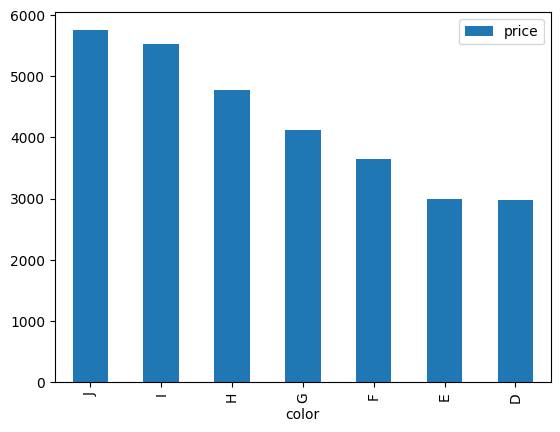

In [57]:
a.plot(kind="bar")